In [1]:
import pandas as pd

# Load the data
df_final = pd.read_csv("weighted_moho.csv")

# Find duplicated (latitude, longitude) pairs
duplicates = df_final.duplicated(subset=["latitude", "longitude"], keep=False)

# Extract and print the full duplicated rows
duplicated_rows = df_final[duplicates]

print(f"Total number of duplicated rows: {len(duplicated_rows)}")
print("\nSample duplicated rows (showing first 10):\n")
duplicated_rows.head(10)


Total number of duplicated rows: 5823

Sample duplicated rows (showing first 10):



,latitude,longitude,rf_moho,spline_moho,err_moho,weighted_moho,lat_bin,lon_bin,Moho,nearest_rf_spline_moho
0,36.43,94.87,49.5,62.995836,13.495836,49.5,36.0,94.0,NaN,NaN
1,36.43,94.87,48.0,62.995836,14.995836,48.0,36.0,94.0,NaN,NaN
6,40.50,95.80,48.8,51.333665,2.533665,48.8,40.0,95.0,NaN,NaN
7,40.50,95.80,49.5,51.333665,1.833665,49.5,40.0,95.0,NaN,NaN
8,32.97,94.14,75.0,70.150259,4.849741,75.0,32.0,94.0,NaN,NaN
9,32.97,94.14,74.3,70.150259,4.149741,74.3,32.0,94.0,NaN,NaN
11,29.37,90.18,80.0,62.732520,17.267480,80.0,29.0,90.0,NaN,NaN
12,28.93,89.74,76.0,60.955688,15.044312,76.0,28.0,89.0,NaN,NaN
13,28.73,89.66,76.0,60.119680,15.880320,76.0,28.0,89.0,NaN,NaN
14,28.49,89.66,62.0,59.083210,2.916790,62.0,28.0,89.0,NaN,NaN


In [2]:
import pandas as pd
from itertools import combinations

# Load the data
path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust.csv"
data_eq_raw = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])

# Clean and filter the data
data_eq_raw["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")
data_eq_all = data_eq_raw.dropna(subset=["Moho_km"]).reset_index(drop=True)

# Get duplicate (Lat, Long) entries
dupes = data_eq_all[data_eq_all.duplicated(subset=["Lat", "Long"], keep=False)]

# Store results
pairwise_results = []

# Group and compare all combinations of Moho_km within each (Lat, Long)
for (lat, lon), group in dupes.groupby(["Lat", "Long"]):
    rows = group.reset_index(drop=True)
    for (i1, row1), (i2, row2) in combinations(rows.iterrows(), 2):
        moho1 = row1["Moho_km"]
        moho2 = row2["Moho_km"]
        diff = abs(moho1 - moho2)
        pairwise_results.append({
            "Lat": lat,
            "Long": lon,
            "Moho_km_1": moho1,
            "Moho_km_2": moho2,
            "Diff": diff
        })

# Convert to DataFrame
pairwise_df = pd.DataFrame(pairwise_results)

# Sort by Diff
pairwise_df_sorted = pairwise_df.sort_values(by="Diff", ascending=False).reset_index(drop=True)

# Display top 10
print(pairwise_df_sorted.head(500))


        Lat     Long  Moho_km_1  Moho_km_2  Diff
0    29.700   91.150       88.0       26.0  62.0
1    29.700   91.150       80.0       26.0  54.0
2    29.700   91.150       79.9       26.0  53.9
3    28.730   89.660       76.0       25.0  51.0
4    34.450  -98.240       25.0       70.0  45.0
..      ...      ...        ...        ...   ...
495   7.970   39.130       27.0       38.2  11.2
496  13.020   77.570       46.0       34.9  11.1
497  50.005    4.595       25.0       36.1  11.1
498  -7.960   31.630       37.9       49.0  11.1
499 -42.420  173.540       34.5       23.4  11.1

[500 rows x 5 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_23100\4192228793.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_eq_raw = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])


In [3]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset("weighted_moho.nc")

# Print contents
print(ds)

# Access variables
print(ds['weighted_moho'])

# Convert to pandas DataFrame if needed
df = ds.to_dataframe().reset_index()
print(df)

<xarray.Dataset> Size: 3MB
Dimensions:        (index: 92346)
Coordinates:
  * index          (index) int64 739kB 0 1 2 3 4 ... 92342 92343 92344 92345
Data variables:
    latitude       (index) float64 739kB ...
    longitude      (index) float64 739kB ...
    weighted_moho  (index) float64 739kB ...
<xarray.DataArray 'weighted_moho' (index: 92346)> Size: 739kB
[92346 values with dtype=float64]
Coordinates:
  * index    (index) int64 739kB 0 1 2 3 4 5 ... 92341 92342 92343 92344 92345
       index  latitude  longitude  weighted_moho
0          0     36.43      94.87      49.500000
1          1     36.43      94.87      48.000000
2          2     36.81      92.95      49.000000
3          3     37.02      91.74      57.000000
4          4     32.25      91.70      74.000000
...      ...       ...        ...            ...
92341  92341    -89.50     175.50      35.096589
92342  92342    -89.50     176.50      35.094330
92343  92343    -89.50     177.50      35.091988
92344  92344    -89.

In [4]:
import pandas as pd

path_to_data_file = r"\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust.csv" ## For windos OR use '\\' instead of '\'#data_eq_raw = pd.read_csv(path_to_data_file, comment='#', sep=r'\s+')

data_eq_raw = pd.read_csv(path_to_data_file, comment='#') # data_eq_raw = pd.read_csv(path_to_data_file, comment='#', delimiter=',')  ## No delimeter is defaulted as comma
# Convert Moho_km to numeric, forcing non-numeric values to NaN
data_eq_raw["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")

# Drop rows with NaN values in Moho_km
data_eq_all = data_eq_raw.dropna(subset=["Moho_km"]).reset_index(drop=True)

# Filter data based on longitude and latitude
data_eq_ind = data_eq_all[
    (data_eq_all["Long"] >= 65) & (data_eq_all["Long"] <= 110) & 
    (data_eq_all["Lat"] >= 5) & (data_eq_all["Lat"] <= 45)
].reset_index(drop=True)

# Check for duplicate (Lat, Long, Moho_km) groups
duplicate_mask = data_eq_all.duplicated(subset=["Lat", "Long", "Moho_km"], keep=False)

# Count duplicate entries
num_duplicates = duplicate_mask.sum()
# Count unique groups that are duplicated
num_repeated_groups = data_eq_all.loc[duplicate_mask, ["Lat", "Long", "Moho_km"]].drop_duplicates().shape[0]

print(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates}")
print(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups}")

# Keep only the first occurrence of each duplicate group
data_eq = data_eq_all.drop_duplicates(subset=["Lat", "Long", "Moho_km"], keep="first").reset_index(drop=True)

# Display the final DataFrame
eq_info = data_eq
data_eq


Total number of repeated (Lat, Long, Moho_km) rows: 2862
Number of unique (Lat, Long, Moho_km) groups that are repeated: 1375


C:\Users\DELL\AppData\Local\Temp\ipykernel_23100\1684601139.py:5: DtypeWarning: Columns (0,1,4,5,6,7,8,12,13,14,19,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data_eq_raw = pd.read_csv(path_to_data_file, comment='#') # data_eq_raw = pd.read_csv(path_to_data_file, comment='#', delimiter=',')  ## No delimeter is defaulted as comma


,Net,Station,Lat,Long,Moho_km,err_moho,Avg_Vp/Vs,Poisson’s_ratio,Elevation,Avg_Vp(km/s),...,Compilation,Comments (Method - other notes etc.),Sub-methods,Comments2,H2 (other methods),err,Vsn2,κ2,Unnamed: 25,Unnamed: 26
0,NaN,A01,36.43,94.87,49.5,NaN,1.78,0.27,NaN,6.20,...,Singh 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A01,36.43,94.87,48.0,NaN,1.81,0.28,NaN,6.22,...,Singh 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,A03,36.81,92.95,49.0,NaN,1.78,0.269,NaN,6.20,...,Singh 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,A05,37.02,91.74,57.0,NaN,1.83,0.287,NaN,6.38,...,Singh 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AMDO,32.25,91.70,74.0,NaN,1.73,0.249,NaN,6.20,...,Singh 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33854,NaN,NaN,57.18,-170.25,34.0,NaN,2.09,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33855,NaN,NaN,60.14,-1.18,28.0,NaN,1.71,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33856,NaN,NaN,62.07,-6.97,26.0,NaN,2.0,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33857,NaN,NaN,70.99,-8.51,14.0,NaN,1.61,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Find all duplicated (Lat, Long) pairs (keep=False marks all occurrences as True)
duplicated_coords = data_eq[data_eq.duplicated(subset=["Lat", "Long"], keep=False)]

# Sort to ensure repeated coordinate rows are together
duplicated_coords = duplicated_coords.sort_values(by=["Lat", "Long"]).reset_index(drop=True)

# Display the repeated coordinate rows

# Save the repeated coordinate rows to a CSV file
output_path = r"\Amitava\Projects\Spline_Moho\repeat\repeated_lat_long_pairs.csv"
duplicated_coords.to_csv(output_path, index=False)
duplicated_coords

,Net,Station,Lat,Long,Moho_km,err_moho,Avg_Vp/Vs,Poisson’s_ratio,Elevation,Avg_Vp(km/s),...,Compilation,Comments (Method - other notes etc.),Sub-methods,Comments2,H2 (other methods),err,Vsn2,κ2,Unnamed: 25,Unnamed: 26
0,NaN,NaN,-89.93,144.44,39.0,NaN,1.75,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-89.93,144.44,25.0,NaN,1.6,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-77.53,167.08,32.0,NaN,1.61,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-77.53,167.08,18.0,NaN,1.6,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-77.52,161.85,32.0,NaN,1.79,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,NaN,NaN,78.18,16.35,32.0,NaN,1.86,NaN,NaN,NaN,...,Stephenson 2024,Hk,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5819,NaN,NaN,78.18,16.35,39.0,NaN,1.67,NaN,NaN,NaN,...,Stephenson 2024,Hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5820,NaN,NaN,78.18,16.37,33.0,NaN,1.82,NaN,NaN,NaN,...,Stephenson 2024,Hk,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5821,NaN,NaN,78.18,16.37,32.0,NaN,1.88,NaN,NaN,NaN,...,Stephenson 2024,Hk,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


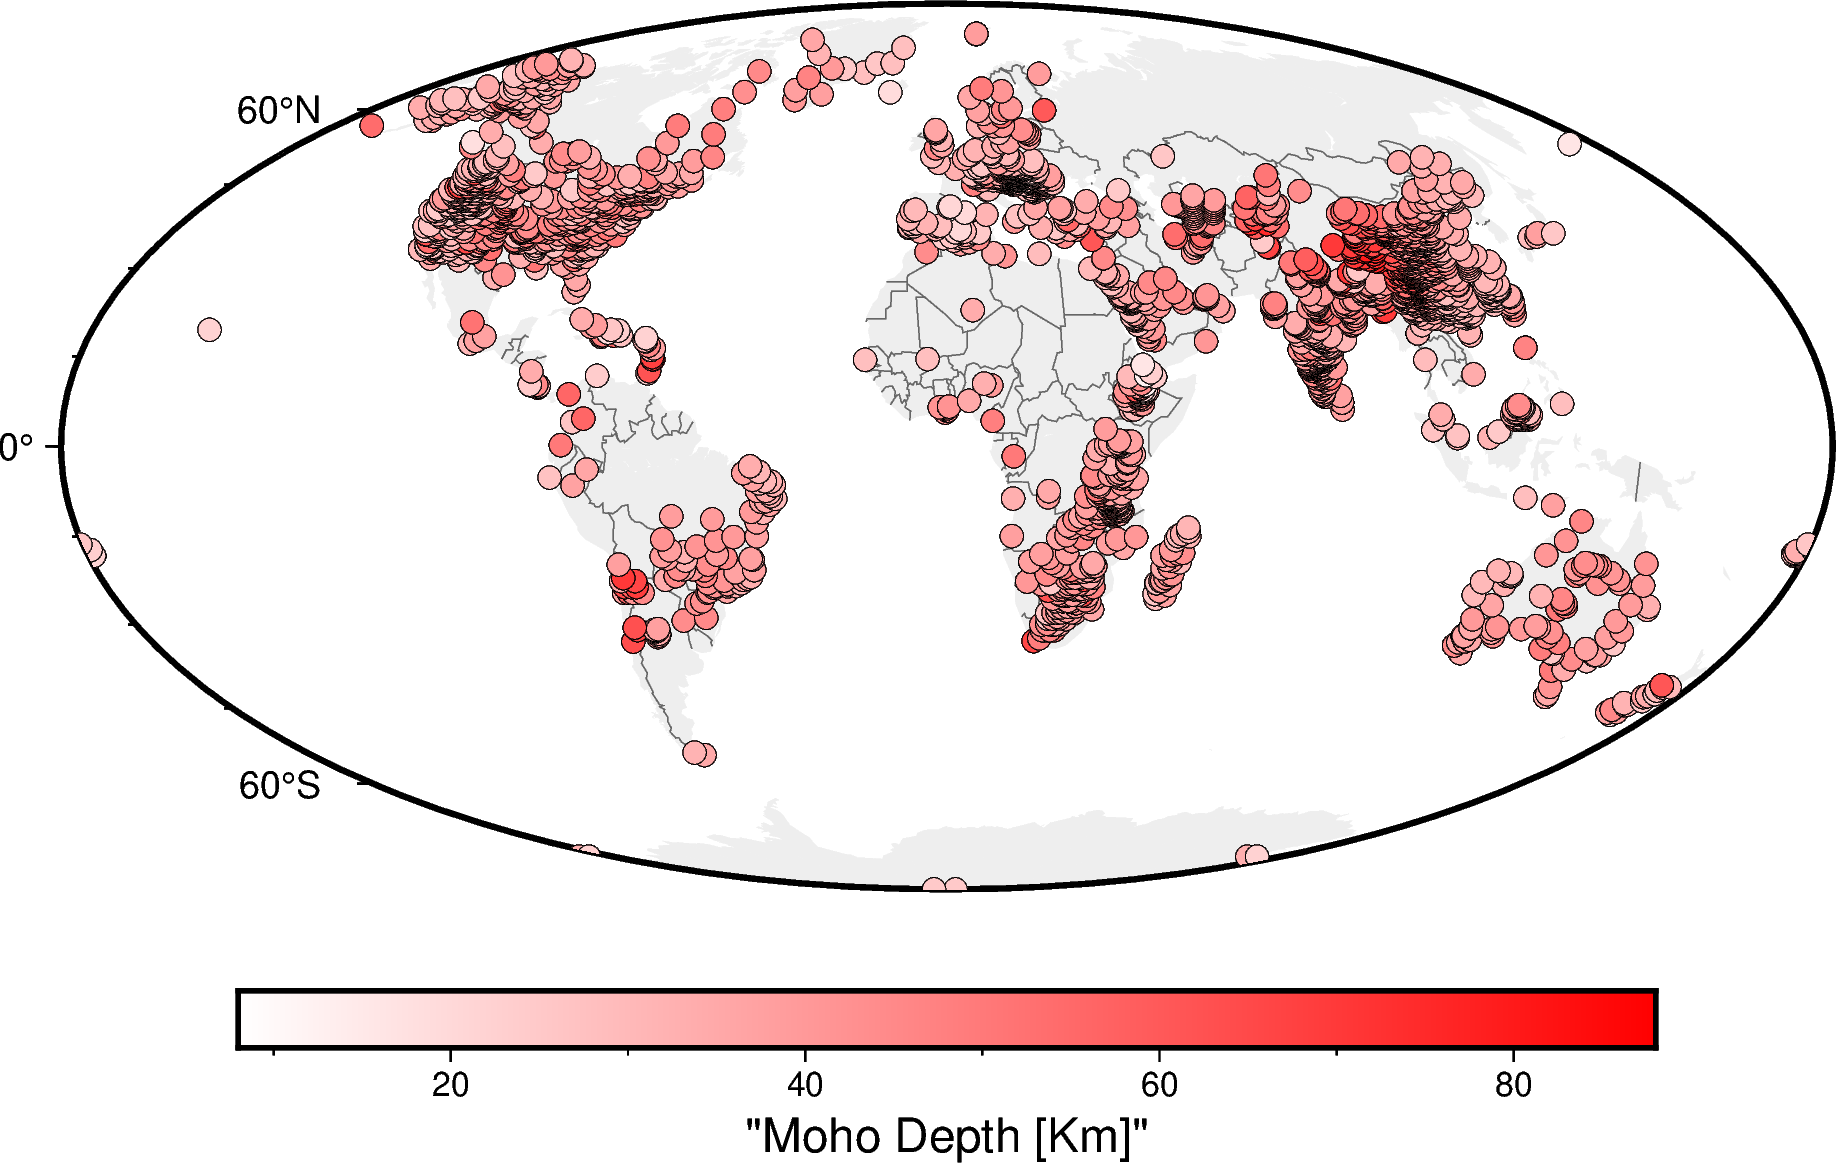

In [6]:
import pygmt
region = [-180, 180, -90, 90]
fig = pygmt.Figure()
# Add a basemap with the data region, Mercator projection, default frame
# and ticks, color in the continents, and display national borders
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[duplicated_coords.Moho_km.min(), duplicated_coords.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=duplicated_coords.Long,
    y=duplicated_coords.Lat,
    fill=duplicated_coords.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.001p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()

In [7]:
## LONG,LAT,MOHO_DEPTH

import pandas as pd

path_to_data_file2 = r"\Amitava\Projects\Spline_Moho\Global_moho_compilation\seisCRUST_thickness.csv" ## For windos OR use '\\' instead of '\'#data_eq_raw = pd.read_csv(path_to_data_file, comment='#', sep=r'\s+')

data_eq_raw2 = pd.read_csv(path_to_data_file2, comment='#') # data_eq_raw = pd.read_csv(path_to_data_file, comment='#', delimiter=',')  ## No delimeter is defaulted as comma
# Convert Moho_km to numeric, forcing non-numeric values to NaN
data_eq_raw2["MOHO_DEPTH"] = pd.to_numeric(data_eq_raw2["MOHO_DEPTH"], errors="coerce")

# Drop rows with NaN values in Moho_km
data_eq_all2 = data_eq_raw2.dropna(subset=["MOHO_DEPTH"]).reset_index(drop=True)

# Check for duplicate (Lat, Long, Moho_km) groups
duplicate_mask2 = data_eq_all2.duplicated(subset=["LAT", "LONG", "MOHO_DEPTH"], keep=False)

# Count duplicate entries
num_duplicates2 = duplicate_mask2.sum()
# Count unique groups that are duplicated
num_repeated_groups2 = data_eq_all2.loc[duplicate_mask2, ["LAT", "LONG", "MOHO_DEPTH"]].drop_duplicates().shape[0]

print(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates2}")
print(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups2}")

# Keep only the first occurrence of each duplicate group
data_eq2 = data_eq_all2.drop_duplicates(subset=["LAT", "LONG", "MOHO_DEPTH"], keep="first").reset_index(drop=True)

# Display the final DataFrame
data_eq2


Total number of repeated (Lat, Long, Moho_km) rows: 1217
Number of unique (Lat, Long, Moho_km) groups that are repeated: 603


,LONG,LAT,MOHO_DEPTH,VP/VS,METHOD,SUB-METHOD,AUTHOR,V_PROFILE(Y/N),LOCATION,SUB_LOCATION
0,35.990,2.0000,22.3,-,Refraction,Slope_Intercept,Achauer1992,Y,Africa,-
1,36.130,0.2300,32.9,-,Refraction,Slope_Intercept,Achauer1992,Y,Africa,-
2,-5.260,33.4700,40.0,-,Refraction,P_reversed,Ayarza2014,Y,Africa,-
3,-5.180,33.6700,34.0,-,Refraction,P_reversed,Ayarza2014,Y,Africa,-
4,-5.130,33.3000,33.0,-,Refraction,P_reversed,Ayarza2014,Y,Africa,-
...,...,...,...,...,...,...,...,...,...,...
26106,178.454,-18.1150,28.5,-,RF_SW_joint,-,Chen2019,N,Pacific,-
26107,178.053,-17.7450,28.5,-,RF_SW_joint,-,Chen2019,N,Pacific,-
26108,179.450,-16.3020,26.0,-,RF_SW_joint,-,Chen2019,N,Pacific,-
26109,-178.814,-18.2330,23.5,-,RF_SW_joint,-,Chen2019,N,Pacific,-


In [8]:
# Find all duplicated (Lat, Long) pairs (keep=False marks all occurrences as True)
duplicated_coords2 = data_eq2[data_eq2.duplicated(subset=["LAT", "LONG"], keep=False)]

# Sort to ensure repeated coordinate rows are together
duplicated_coords2 = duplicated_coords2.sort_values(by=["LAT", "LONG"]).reset_index(drop=True)

# Display the repeated coordinate rows

# Save the repeated coordinate rows to a CSV file
duplicated_coords2

,LONG,LAT,MOHO_DEPTH,VP/VS,METHOD,SUB-METHOD,AUTHOR,V_PROFILE(Y/N),LOCATION,SUB_LOCATION
0,167.95,-45.89,35.5,1.9,Hk,Transfer_function,Ramlakhan2022,N,New_Zealand,-
1,167.95,-45.89,36.8,1.767,Hk,-,Spasojevic2008,N,New_Zealand,-
2,168.12,-45.37,37.5,1.9,Hk,Transfer_function,Ramlakhan2022,N,New_Zealand,-
3,168.12,-45.37,45.4,1.727,Hk,-,Spasojevic2008,N,New_Zealand,-
4,170.18,-44.39,35.0,1.9,Hk,Transfer_function,Ramlakhan2022,N,New_Zealand,-
...,...,...,...,...,...,...,...,...,...,...
3739,-56.14,72.79,32.0,-,RF_other,forward_model,Kumar2007,Y,Greenland,-
3740,-68.80,76.50,37.0,1.78,Hk,-,Dahl-Jensen2003,N,Greenland,-
3741,-68.80,76.50,36.0,-,RF_other,forward_model,Kumar2007,Y,Greenland,-
3742,16.37,78.18,33.0,1.82,Hk,-,Artemieva2013,N,Europe,-


In [1]:
import pandas as pd

# Load data
path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust.csv"
data_eq = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])
data_eq["Moho_km"] = pd.to_numeric(data_eq["Moho_km"], errors="coerce")

# Count duplicate Lat-Long pairs
duplicate_pairs = data_eq.duplicated(subset=["Lat", "Long"], keep=False)

# Filter only duplicates and group
duplicates_df = data_eq[duplicate_pairs]
duplicate_counts = duplicates_df.groupby(["Lat", "Long"]).size().reset_index(name="Count")

# Show only the ones that appear more than once
repeated_pairs = duplicate_counts[duplicate_counts["Count"] > 1]

# Output number of duplicate Lat-Long pairs
num_duplicate_pairs = len(repeated_pairs)

print(f"Number of repeated Lat-Long pairs: {num_duplicate_pairs}")
print(repeated_pairs.head())  # Optional: show some examples


Number of repeated Lat-Long pairs: 0
Empty DataFrame
Columns: [Lat, Long, Count]
Index: []
